In [1]:
# importing libraries
# импорт библиотек

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import datetime as dt

# Graphics in SVG format are more sharp and legible
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

In [2]:
# dataframe overview
# обзор датафрейма

df = pd.read_excel('/Users/karimalibekov/Desktop/python/PET PROJECTS/data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# dataframe info, dtypes
# информация о датафрейме, размер, тип колонок

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# checking missing values
# проверка пропущенных значений

missing_values = df.isnull().sum()

missing_values[missing_values > 0]

Description      1454
CustomerID     135080
dtype: int64

In [5]:
# dropping rows with no CustomerID
# удаляем ряды без CustomerID

df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
# creating a function for getting invoice month 
# создаем функцию для получения нужной даты, в данном случае месяца заказа (1 день месяца)

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.tail()                                                 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


## Cohort Analysis

#### Когортный анализ

In [7]:
# creating a column index with the minimum invoice date (first time customer was acquired)
# создание индекса столбца с минимальной датой выставления счета (датой первого приобретения клиента)

df['Cohort Month'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01


In [8]:
# create a date element function to get a series for subtraction
# создание функции вычленения элемента даты в виде серии для последующего вычитания

def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [9]:
# get date elements for our cohort and invoice columns
# применение функции для колонок Cohort Month и Invoice Month

_,Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(df,'Cohort Month')

In [10]:
# check the series 
# проверка полученной серии

Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int64

In [12]:
# create a cohort index (in number of months, +1 is added so that there is no month zero)
# создание индекса когорты (в количестве месяцев, +1 добавляется, чтобы не было нулевого месяца)

year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [13]:
# count the CustomerID using grouping by Cohort Month  and Cohort Index 
# считаем CustomerID, используя группировку по месяцам когорты и индексу когорты

cohort_data = df.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [15]:
# create a pivot table 
# создание сводной таблицы

cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# change index format
# изменение формата индекса 

cohort_table.index = cohort_table.index.strftime('%B %Y')

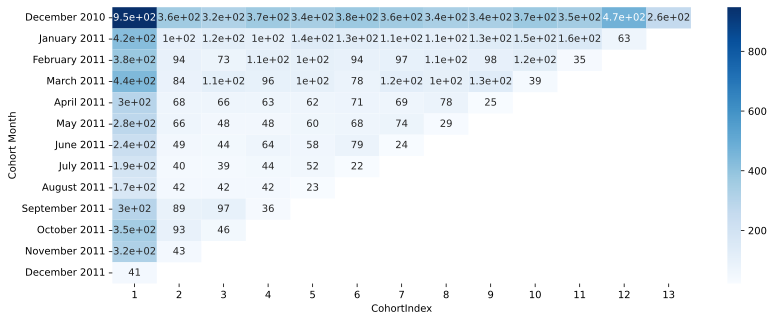

In [23]:
# visualization of our results in heatmap
# визуализация результата в виде тепловой карты

plt.figure(figsize=(13,5))
sns.heatmap(cohort_table,annot=True,cmap='Blues');

In [24]:
# cohort table as a percentage of the first month
# когортная таблица в виде процента от первого месяца

new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


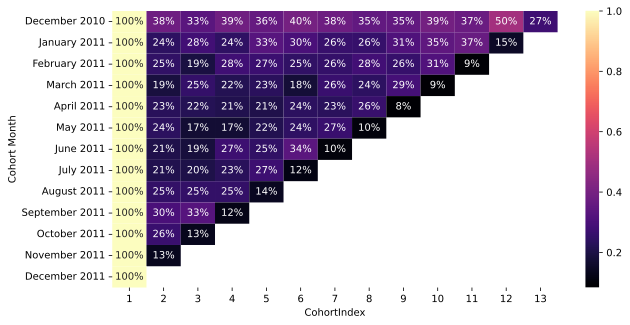

In [26]:
# heatmap visualization in %
# тепловая карта с %

plt.figure(figsize=(10,5))
sns.heatmap(new_cohort_table, annot=True, cmap='magma', fmt='.0%');

## RFM analysis

#### RFM анализ

In [27]:
# duplicating data frame, dropping useless for analysis columns and overview
# создание дубликата датафрейма, удаление лишних для анализа колонок и обзор датафрейма

rfm_df = df
rfm_df = rfm_df.drop(columns=['InvoiceMonth', 'Cohort Month', 'CohortIndex'])
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
# changing data type of InvoiceDate column
# изменение типа данных колонки InvoiceDate

rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate']).dt.date
rfm_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [29]:
# date of the last purchase
# дата последней покупки

last_date = rfm_df.InvoiceDate.max()
last_date

datetime.date(2011, 12, 9)

In [30]:
# creating an RFM table 
# создание RFM таблицы

rfmTable = rfm_df.groupby('CustomerID', as_index=False).agg({'InvoiceDate': lambda x: (last_date - x.max()).days, # Recency # Количество дней с последнего заказа
                                        'InvoiceNo': lambda x: len(x),      # Frequency # Количество заказов
                                        'UnitPrice': lambda x: x.sum()}) # Monetary Value # Общая сумма по всем заказам

In [31]:
rfmTable

,CustomerID,InvoiceDate,InvoiceNo,UnitPrice
0,12346.0,325,2,2.08
1,12347.0,2,182,481.21
2,12348.0,75,31,178.71
3,12349.0,18,73,605.10
4,12350.0,310,17,65.30
...,...,...,...,...
4367,18280.0,277,10,47.65
4368,18281.0,180,7,39.36
4369,18282.0,7,13,62.68
4370,18283.0,3,756,1220.93


In [32]:
# checking for missing CustomerID
# проверка на упущенные CustomerID

df.CustomerID.nunique()

4372

In [33]:
# changing data type of InvoiceDate column for further calculations + renaming columns
# изменение типа данных колонки InvoiceDate для дальнейших расчетов + переименование колонок

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'UnitPrice': 'monetary_value'}, inplace=True)
rfmTable

,CustomerID,recency,frequency,monetary_value
0,12346.0,325,2,2.08
1,12347.0,2,182,481.21
2,12348.0,75,31,178.71
3,12349.0,18,73,605.10
4,12350.0,310,17,65.30
...,...,...,...,...
4367,18280.0,277,10,47.65
4368,18281.0,180,7,39.36
4369,18282.0,7,13,62.68
4370,18283.0,3,756,1220.93


In [35]:
# dividing data into quantiles for setting score from 1-5
# разделение данных на квантили для выставления оценки от 1 до 5

quantiles = rfmTable[['recency', 'frequency', 'monetary_value']].quantile([.2, .4, .6, .8]).to_dict()
quantiles

{'recency': {0.2: 11.0, 0.4: 31.0, 0.6: 71.0, 0.8: 178.0},
 'frequency': {0.2: 14.0, 0.4: 29.0, 0.6: 58.0, 0.8: 124.0},
 'monetary_value': {0.2: 41.064,
  0.4: 94.336,
  0.6: 180.58199999999997,
  0.8: 374.51000000000005}}

##### difference is that lesser recency score is the best, while bigger frequency and monetary value is better
##### чем меньше показатель давности покупки – тем лучше, в то время как чем выше показатель частоты покупок и суммы покупок – тем лучше

In [36]:
# functions for setting R, F, M scores
# функции для выставления R, F, M оценок

def r_score(x):
    if x <= quantiles['recency'][.2]:
        return 5
    elif x <= quantiles['recency'][.4]:
        return 4
    elif x <= quantiles['recency'][.6]:
        return 3
    elif x <= quantiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][.2]:
        return 1
    elif x <= quantiles[c][.4]:
        return 2
    elif x <= quantiles[c][.6]:
        return 3
    elif x <= quantiles[c][.8]:
        return 4
    else:
        return 5    

In [38]:
# applying functions and displaying scores in new columns
# применение функций и отображение результатов в новых колонках

rfmTable['R'] = rfmTable['recency'].apply(lambda x: r_score(x))
rfmTable['F'] = rfmTable['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfmTable['M'] = rfmTable['monetary_value'].apply(lambda x: fm_score(x, 'monetary_value'))
rfmTable['RFM Score'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)
rfmTable

,CustomerID,recency,frequency,monetary_value,R,F,M,RFM Score
0,12346.0,325,2,2.08,1,1,1,111
1,12347.0,2,182,481.21,5,5,5,555
2,12348.0,75,31,178.71,2,3,3,233
3,12349.0,18,73,605.10,4,4,5,445
4,12350.0,310,17,65.30,1,2,2,122
...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,47.65,1,1,2,112
4368,18281.0,180,7,39.36,1,1,1,111
4369,18282.0,7,13,62.68,5,1,2,512
4370,18283.0,3,756,1220.93,5,5,5,555


In [39]:
# segmentation of customers based on matrix of R & F scores
# сегментация клиентов на основе матрицы R & F значений

segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfmTable['Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str)
rfmTable['Segment'] = rfmTable['Segment'].replace(segt_map, regex=True)
rfmTable

,CustomerID,recency,frequency,monetary_value,R,F,M,RFM Score,Segment
0,12346.0,325,2,2.08,1,1,1,111,hibernating
1,12347.0,2,182,481.21,5,5,5,555,champions
2,12348.0,75,31,178.71,2,3,3,233,at risk
3,12349.0,18,73,605.10,4,4,5,445,loyal customers
4,12350.0,310,17,65.30,1,2,2,122,hibernating
...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,10,47.65,1,1,2,112,hibernating
4368,18281.0,180,7,39.36,1,1,1,111,hibernating
4369,18282.0,7,13,62.68,5,1,2,512,new customers
4370,18283.0,3,756,1220.93,5,5,5,555,champions


##### visual demonstration of code above

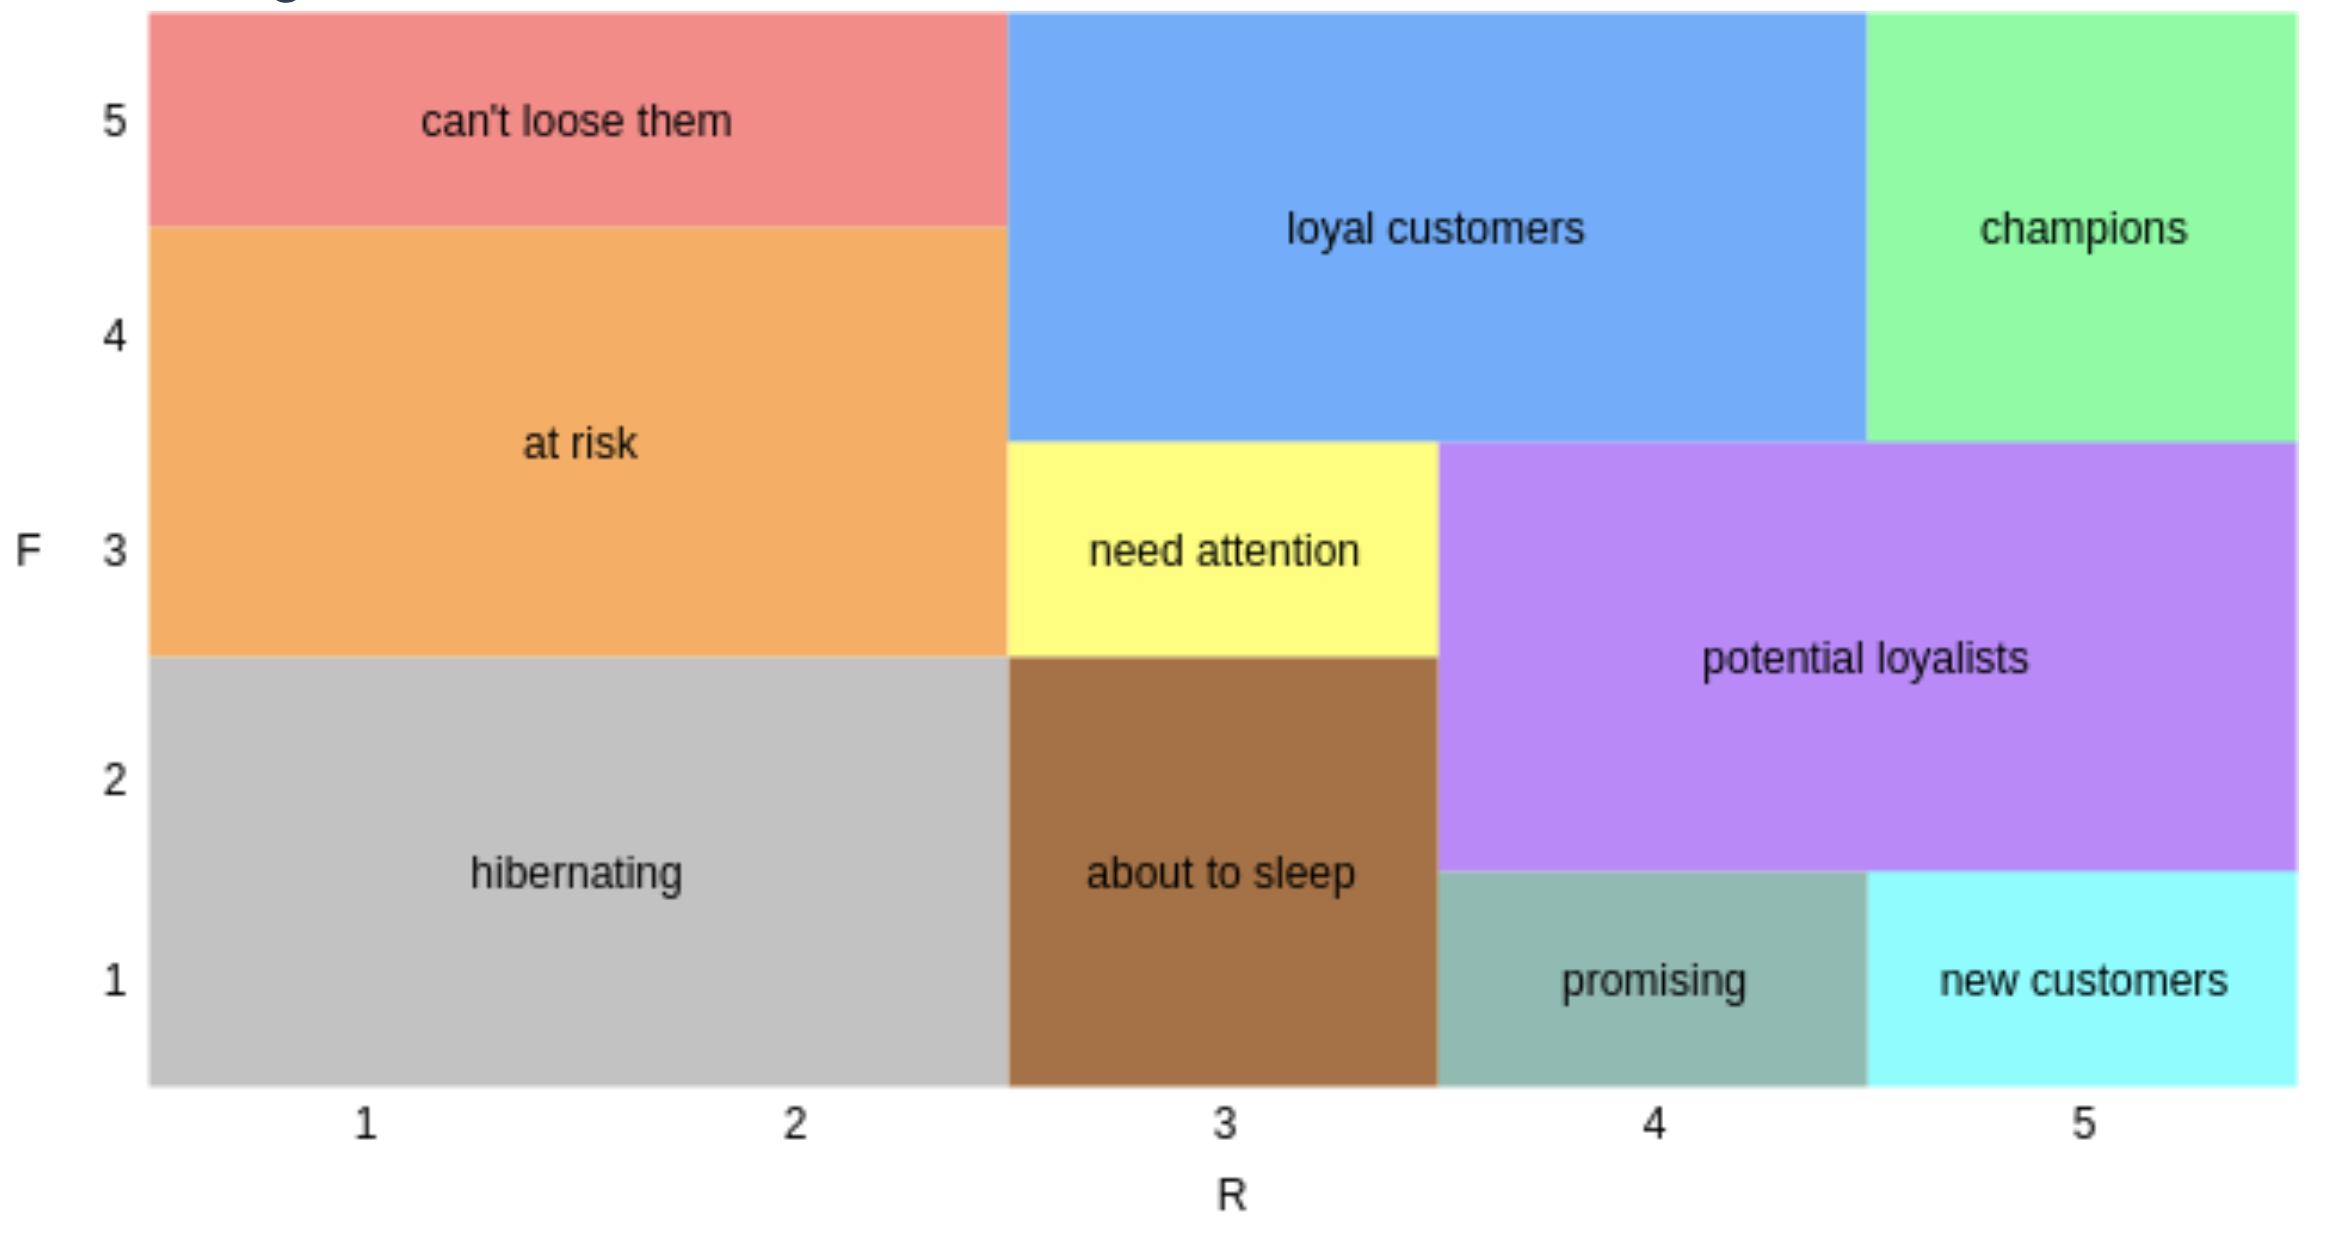

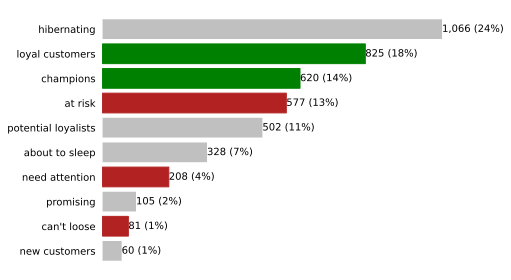

In [41]:
# counting the number of customers in each segment and highlighting important segments
# подсчет количества клиентов в каждом сегменте и выделение важных сегментов

segments_counts = rfmTable['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        elif segments_counts.index[i] in ['at risk', 'need attention', "can't loose"]:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [43]:
# all combinations of R & F & M scores
# все комбинации оценок R & F & M

rfmTable['RFM Score'].unique()

array(['111', '555', '233', '445', '122', '345', '134', '112', '444',
       '355', '523', '222', '543', '125', '511', '344', '333', '433',
       '144', '255', '545', '434', '243', '322', '455', '343', '312',
       '234', '245', '123', '334', '323', '554', '232', '133', '533',
       '544', '411', '211', '423', '244', '524', '532', '534', '223',
       '155', '115', '443', '332', '422', '324', '432', '521', '354',
       '412', '512', '313', '145', '124', '311', '212', '535', '143',
       '221', '522', '413', '321', '224', '113', '114', '213', '121',
       '225', '421', '132', '531', '454', '431', '254', '314', '215',
       '331', '231', '435', '542', '235', '135', '242', '154', '342',
       '353', '453', '442', '315', '424', '514', '325', '214', '414',
       '553'], dtype=object)

##### visualization of the distribution of customers' monetary value score for each frequency and recency score
##### визуализация распределения показателя суммы покупок клиентов по каждому показателю частоты покупок и давности покупок

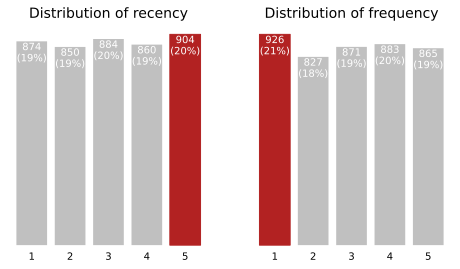

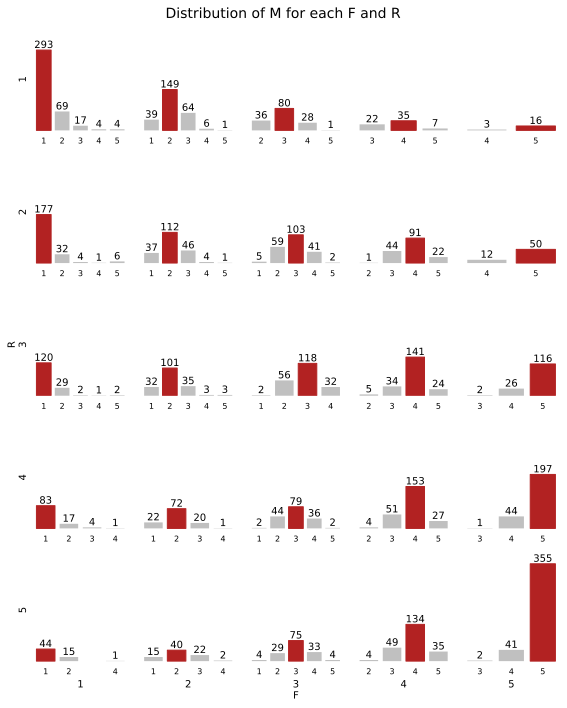

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'recency', 'F':'frequency'}
    y = rfmTable[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(8, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfmTable[(rfmTable['R'] == r) & (rfmTable['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()